# Análise dos Resultados

In [24]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Configurando o tema do MatplotLib

In [87]:
plt.style.use('fivethirtyeight')

Abrindo o arquivo

## Agregando os dados dos datasets

Nesse diretório o arquivo "reporti.csv" corresponde ao relatório proveniente da execução dos experimento no dataset de id i. \
A relação entre dataset e id está no relatório

In [18]:
# Iremos concatenar os resultados em um único DataFrame
df = pd.read_csv("report0.csv", index_col=0)
# Adicionamos uma coluna para diferenciar os datasets
df['DS'] = 0

for i in range(1,10):
    df_aux = pd.read_csv("report{}.csv".format(i), index_col=0)
    # Adicionamos uma coluna para diferenciar os datasets
    df_aux['DS'] = i

    df = pd.concat([df, df_aux])

df

p  Iter      Metodo       Raio       ARS  silhoeta  Matrix_Comp_time  \
0    1     0  Alg-Approx  34.968665  0.270939  0.107177         10.902891   
1    1     1  Alg-Approx  35.071763  0.263479  0.121408         10.902891   
2    1     2  Alg-Approx  35.538960  0.233802  0.105968         10.902891   
3    1     3  Alg-Approx  34.450237  0.270345  0.120085         10.902891   
4    1     4  Alg-Approx  34.848010  0.290266  0.125002         10.902891   
..  ..   ...         ...        ...       ...       ...               ...   
115  2    25      KMeans   6.031980  0.818237  0.295788          0.000000   
116  2    26      KMeans   6.036085  0.817114  0.295974          0.000000   
117  2    27      KMeans   6.031980  0.818237  0.295788          0.000000   
118  2    28      KMeans   6.032136  0.817180  0.295899          0.000000   
119  2    29      KMeans   6.036085  0.818269  0.296030          0.000000   

     Cluster_Comp_time  Total_Comp_time  DS  
0             3.714187        14.617078   0  
1             3.733337        14.636229   0  
2             3.829712        14.732603   0  
3             3.782177        14.685069   0  
4             3.653523        14.556414   0  
..                 ...              ...  ..  
115           0.006078         0.006078   9  
116           0.005798         0.005798   9  
117           0.006220         0.006220   9  
118           0.007171         0.007171   9  
119           0.007149         0.007149   9  

[1200 rows x 10 columns]

Gerando as médias e desvios padrões dos dados. \
Note que aqui o agrupamento não separa os dados apenas por Algoritmo e valor de p, mas também separa por DataSet

In [21]:
avg = df[['DS','p','Metodo','Raio','ARS','silhoeta','Matrix_Comp_time', 'Cluster_Comp_time', 'Total_Comp_time']].groupby(['DS', 'Metodo', 'p']).mean()
avg.columns = ['Raio_avg', 'ARS_avg', 'silhoeta_avg', 'Matrix_Comp_time_avg', 'Cluster_Comp_time_avg',
       'Total_Comp_time_avg']
std = df[['DS','p','Metodo','Raio','ARS','silhoeta','Matrix_Comp_time', 'Cluster_Comp_time', 'Total_Comp_time']].groupby(['DS', 'Metodo', 'p']).std()
std.columns = ['Raio_std', 'ARS_std', 'silhoeta_std', 'Matrix_Comp_time_std', 'Cluster_Comp_time_std',
       'Total_Comp_time_std']

# Concatenamos os datasets de média e desvio padrão dos resultados
results = pd.concat([avg,std], axis=1)
# Reordenamos as colunas
results = results[['Raio_avg', 'Raio_std','ARS_avg', 'ARS_std', 'silhoeta_avg', 'silhoeta_std', 'Matrix_Comp_time_avg', 'Matrix_Comp_time_std', 'Cluster_Comp_time_avg', 'Cluster_Comp_time_std', 'Total_Comp_time_avg', 'Total_Comp_time_std']]
results

Raio_avg  Raio_std   ARS_avg   ARS_std  silhoeta_avg  \
DS Metodo     p                                                          
0  Alg-Approx 1  34.982742  0.335249  0.270609  0.017418      0.116634   
              2   8.216102  0.070416  0.176659  0.031821      0.102900   
              3   5.768070  0.026146  0.132819  0.036731      0.099931   
   KMeans     2  10.650625  1.051218  0.385224  0.011374      0.162073   
1  Alg-Approx 1   6.866908  0.488924  0.027890  0.033600      0.271155   
              2   4.303860  0.190860  0.034930  0.033308      0.285230   
              3   3.645878  0.168829  0.036514  0.039478      0.291373   
   KMeans     2   4.324988  0.700866  0.003275  0.012221      0.374665   
2  Alg-Approx 1   7.966496  0.940920  0.066054  0.036890      0.373599   
              2   4.501091  0.592219  0.055602  0.038578      0.355460   
              3   4.082317  0.514263  0.052441  0.048930      0.348072   
   KMeans     2   4.289802  0.009710  0.012891  0.000229      0.329268   
3  Alg-Approx 1  92.242730  4.187031 -0.002393  0.002805      0.699241   
              2  26.592915  1.138983 -0.000930  0.000000      0.805730   
              3  20.235801  0.231031 -0.000930  0.000000      0.836721   
   KMeans     2  37.673992  0.152896  0.080109  0.051535      0.175780   
4  Alg-Approx 1  11.630281  1.386512  0.033913  0.027178      0.693802   
              2   8.461998  0.800854  0.031919  0.008483      0.738724   
              3   7.905489  0.967498  0.025653  0.022979      0.701080   
   KMeans     2   9.078533  0.316875  0.044124  0.009896      0.428112   
5  Alg-Approx 1   9.973194  0.810606  0.087976  0.073266      0.233157   
              2   5.132396  0.387870  0.098661  0.074952      0.282055   
              3   4.302710  0.302510  0.071116  0.068378      0.249383   
   KMeans     2   8.152009  0.053446  0.146531  0.051303      0.295588   
6  Alg-Approx 1  63.213707  2.296512 -0.001375  0.000553      0.880418   
              2  31.788111  1.229437 -0.001492  0.000534      0.878051   
              3  23.816097  0.917958 -0.006147  0.002385      0.852924   
   KMeans     2  32.921117  2.089441  0.076962  0.020366      0.473546   
7  Alg-Approx 1  15.040660  0.915106  0.026735  0.025708      0.215829   
              2   6.593167  0.428227  0.029186  0.034749      0.233187   
              3   5.377758  0.481099  0.023294  0.031937      0.250002   
   KMeans     2   5.855073  0.225172  0.042901  0.042575      0.191398   
8  Alg-Approx 1  29.886603  1.341824  0.180626  0.069737      0.151167   
              2   7.881135  0.318672  0.202061  0.070493      0.152039   
              3   5.624492  0.277966  0.173570  0.068638      0.127628   
   KMeans     2   5.778805  0.001931  0.253746  0.000116      0.216362   
9  Alg-Approx 1  10.604964  0.563764  0.322747  0.124600      0.226405   
              2   4.948847  0.211156  0.236084  0.139492      0.196614   
              3   4.208893  0.185092  0.258759  0.152283      0.196227   
   KMeans     2   5.993111  0.221977  0.809032  0.049171      0.295456   

                 silhoeta_std  Matrix_Comp_time_avg  Matrix_Comp_time_std  \
DS Metodo     p                                                             
0  Alg-Approx 1      0.006975             10.902891                   0.0   
              2      0.008961             13.400845                   0.0   
              3      0.007034             19.210520                   0.0   
   KMeans     2      0.004567              0.000000                   0.0   
1  Alg-Approx 1      0.040799              4.094209                   0.0   
              2      0.039510              4.087434                   0.0   
              3      0.019595              4.186341                   0.0   
   KMeans     2      0.028000              0.000000                   0.0   
2  Alg-Approx 1      0.035281              7.546248                   0.0   
              2      0.033991              8.397292           

## Gerando Visualizações

Função que gera visualizações de uma coluna do DataFrame que possui os resultados dos experimentos de todos os datasets agregados.

In [92]:
def buil_graph(results, column, title, column_name):
    colors = ['lightcoral','red','darkorange','gold','yellowgreen','palegreen','mediumturquoise','deepskyblue','indigo', 'magenta']
    xs = [0,5,10,15,20,25,30,35,40,45]
    plt.figure(figsize=(18,15))
    xoff = 0

    xmarks = []
    xlabels = []

    for (ds, Metod, p) in results.index:
        if(p==1):
            xoff = 0
        if(p==1):
            plt.bar(xs[ds] + xoff, results.loc[(ds, Metod, p),column], color=colors[ds], label="Dataset: {}".format(ds))
        else:
            plt.bar(xs[ds] + xoff, results.loc[(ds, Metod, p),column], color=colors[ds])

        xmarks.append(xs[ds] + xoff)
        xlabels.append("{}-p:{}".format(Metod, p))
        xoff +=1

    plt.xticks(xmarks, xlabels, rotation=90)

    plt.title(title, fontsize=18)
    plt.ylabel(column_name, fontsize=14)
    plt.legend()
    plt.plot()

## Verificando alguns gráficos

Raio Médio por Dataset

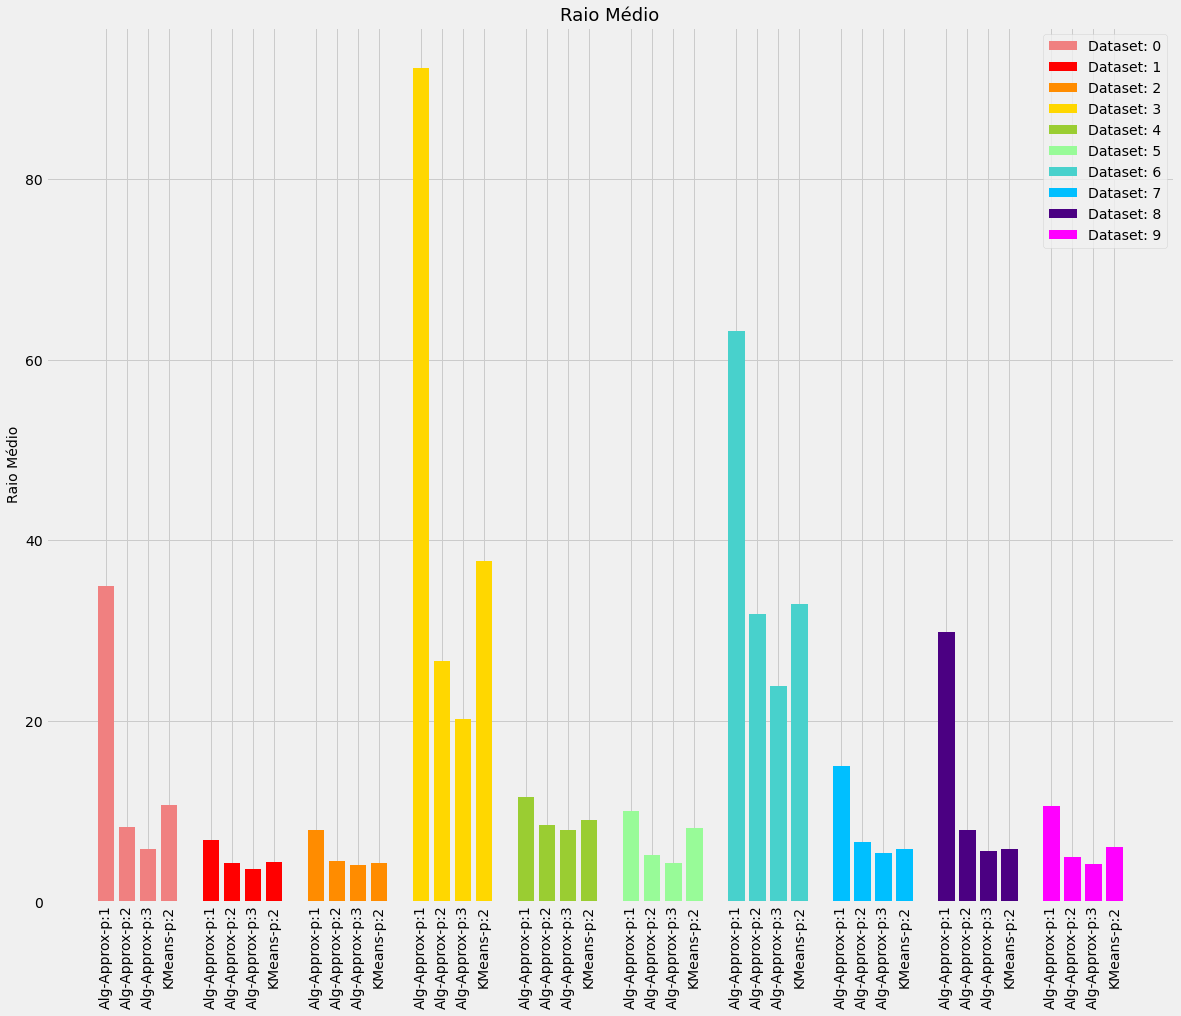

In [93]:
buil_graph(results, 'Raio_avg', 'Raio Médio', 'Raio Médio')

ARS Médio por Dataset

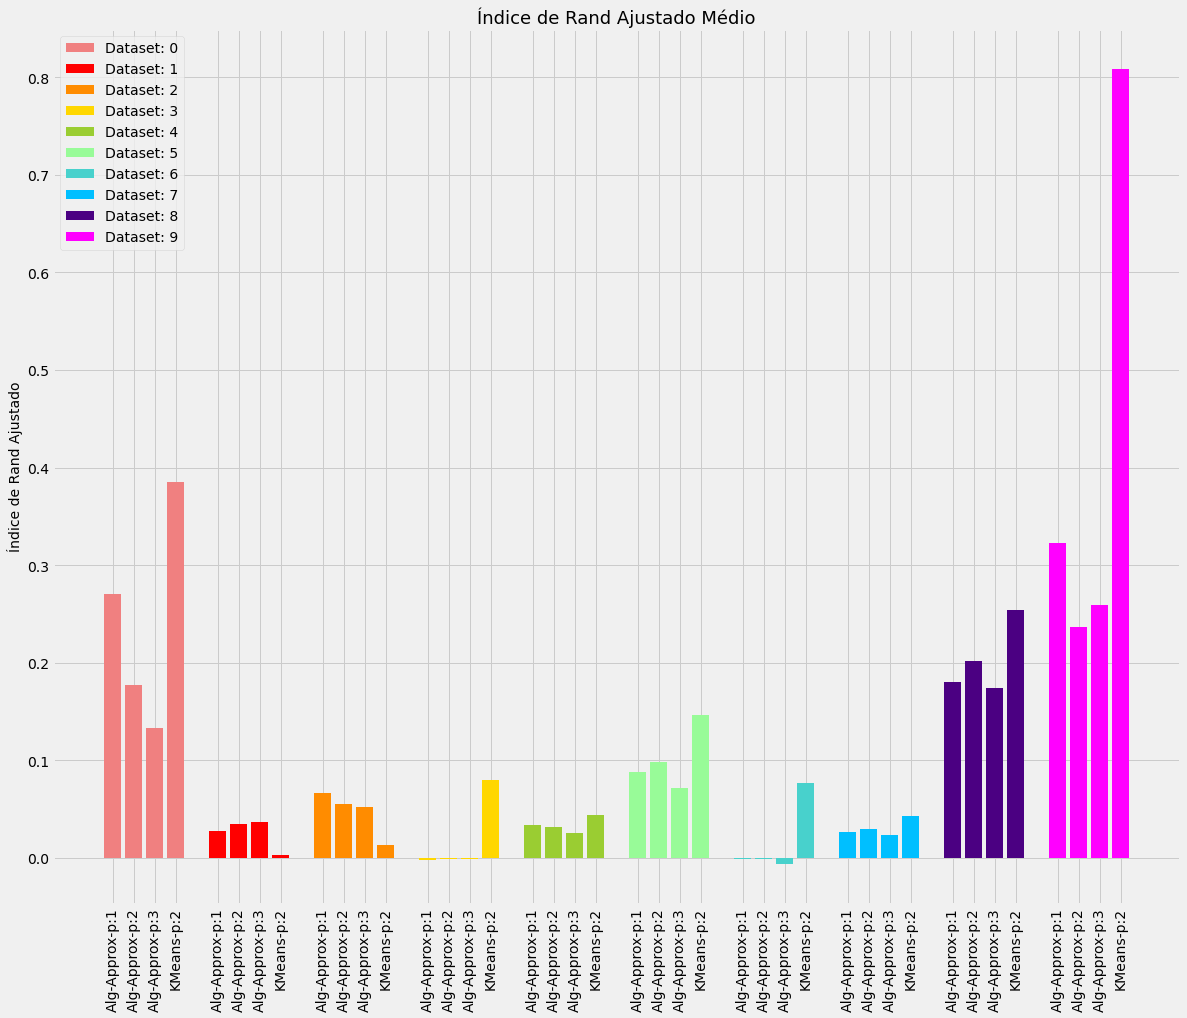

In [94]:
buil_graph(results, 'ARS_avg', 'Índice de Rand Ajustado Médio', 'Índice de Rand Ajustado')

Silhueta Média por Dataset

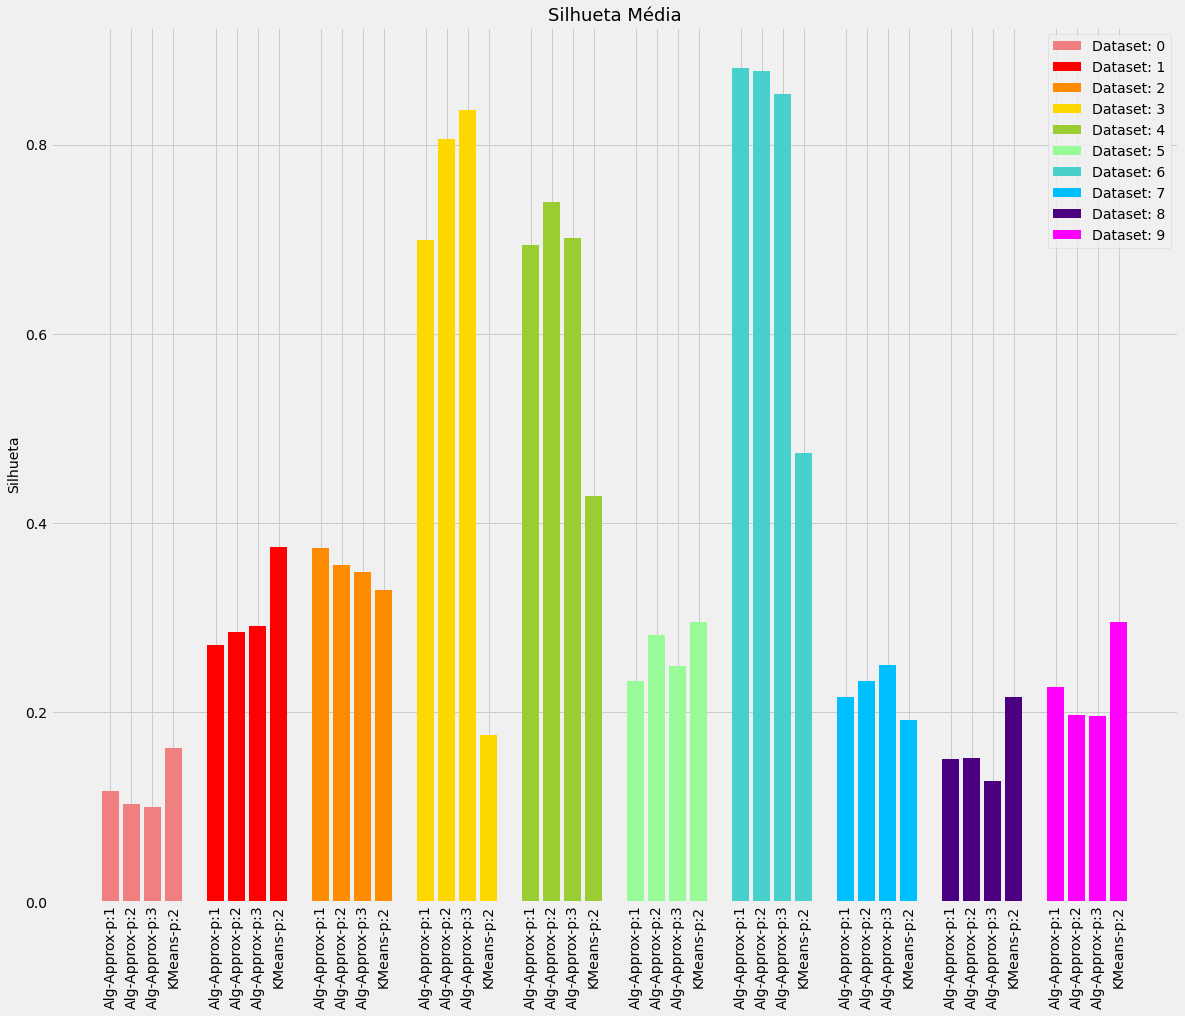

In [95]:
buil_graph(results, 'silhoeta_avg', 'Silhueta Média', 'Silhueta')

Tempo de Computação Médio por Dataset

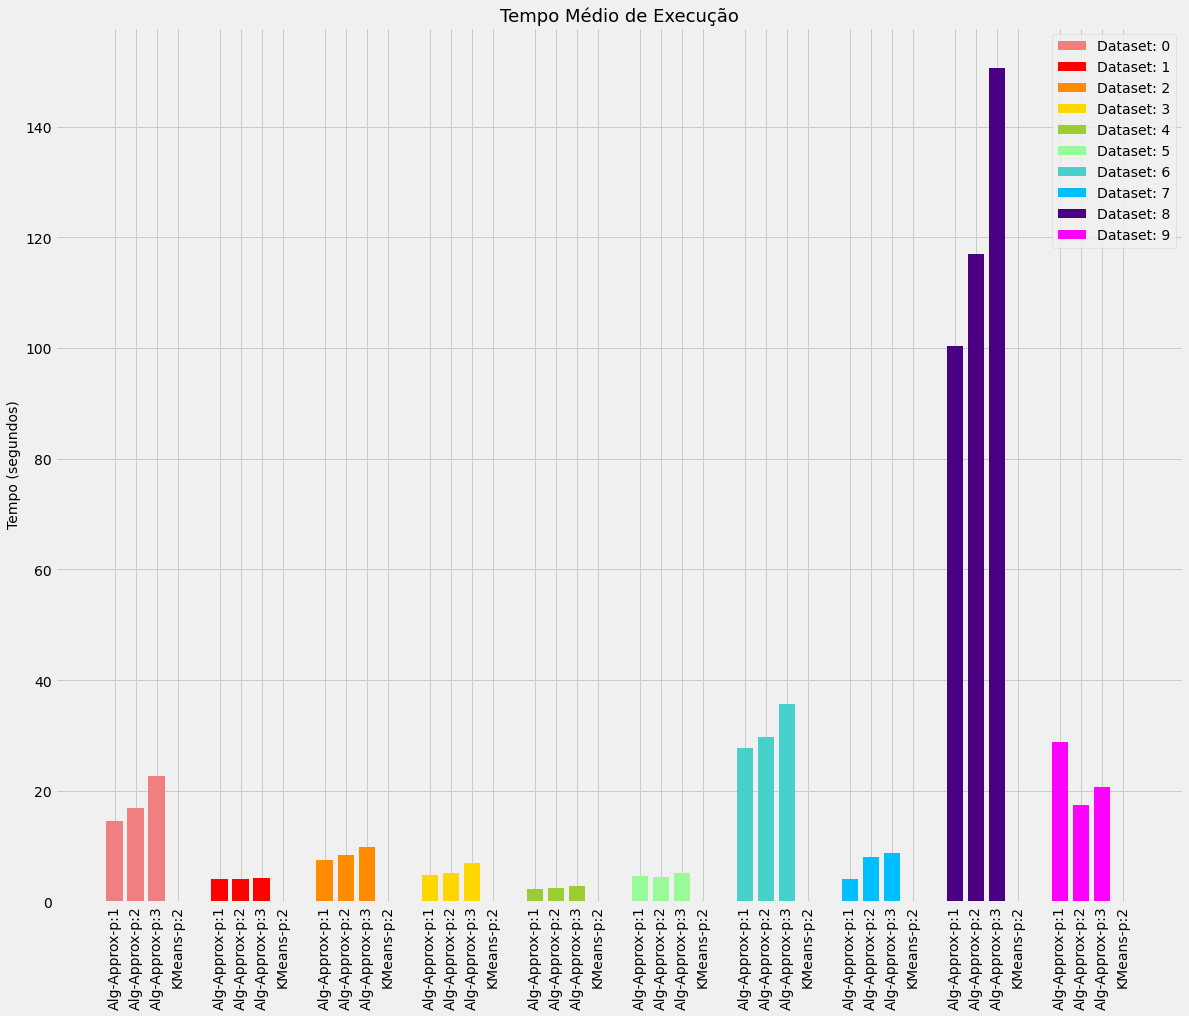

In [90]:
buil_graph(results, 'Total_Comp_time_avg', 'Tempo Médio de Execução', 'Tempo (segundos)')

Decomposição do tempo de execução dos algoritmos em tempo de computação da matriz de distância e tempo de construção dos centros \
Note que o KMeans não passa pela etapa de computação da matriz de distância.

In [91]:
df[['p','Metodo','Matrix_Comp_time', 'Cluster_Comp_time', 'Total_Comp_time']].groupby(['Metodo', 'p']).mean().round(2)

Matrix_Comp_time  Cluster_Comp_time  Total_Comp_time
Metodo     p                                                      
Alg-Approx 1             19.51               0.37            19.89
           2             21.00               0.36            21.36
           3             26.38               0.35            26.73
KMeans     2              0.00               0.04             0.04

## Gerando as Estatísticas Globais

Calculamos as estatísticas, mas dessa vez independente do Dataset. \
Aqui todos os experimentos são juntados para as métricas serem computadas.

In [96]:
avg = df[['p','Metodo','Raio','ARS','silhoeta','Matrix_Comp_time', 'Cluster_Comp_time', 'Total_Comp_time']].groupby(['Metodo', 'p']).mean()
avg.columns = ['Raio_avg', 'ARS_avg', 'silhoeta_avg', 'Matrix_Comp_time_avg', 'Cluster_Comp_time_avg',
       'Total_Comp_time_avg']
std = df[['p','Metodo','Raio','ARS','silhoeta','Matrix_Comp_time', 'Cluster_Comp_time', 'Total_Comp_time']].groupby(['Metodo', 'p']).std()
std.columns = ['Raio_std', 'ARS_std', 'silhoeta_std', 'Matrix_Comp_time_std', 'Cluster_Comp_time_std',
       'Total_Comp_time_std']

results_all = pd.concat([avg,std], axis=1)
# Reordenando as colunas
results_all = results_all[['Raio_avg', 'Raio_std','ARS_avg', 'ARS_std', 'silhoeta_avg', 'silhoeta_std', 'Matrix_Comp_time_avg', 'Matrix_Comp_time_std', 'Cluster_Comp_time_avg', 'Cluster_Comp_time_std', 'Total_Comp_time_avg', 'Total_Comp_time_std']]
results_all.columns = ['Raio_avg', 'Raio_std','ARS_avg', 'ARS_std', 'silhueta_avg', 'silhueta_std', 'Matrix_Comp_time_avg', 'Matrix_Comp_time_std', 'Cluster_Comp_time_avg', 'Cluster_Comp_time_std', 'Total_Comp_time_avg', 'Total_Comp_time_std']

In [98]:

display_df = results_all.transpose()
display_df = display_df.round(2)
display_df

Metodo                Alg-Approx               KMeans
p                              1      2      3      2
Raio_avg                   28.24  10.84   8.50  12.47
Raio_std                   27.17   9.40   6.94  11.67
ARS_avg                     0.10   0.09   0.08   0.19
ARS_std                     0.12   0.10   0.10   0.24
silhueta_avg                0.39   0.40   0.40   0.29
silhueta_std                0.26   0.28   0.28   0.11
Matrix_Comp_time_avg       19.51  21.00  26.38   0.00
Matrix_Comp_time_std       28.55  32.97  42.54   0.00
Cluster_Comp_time_avg       0.37   0.36   0.35   0.04
Cluster_Comp_time_std       1.10   1.07   1.05   0.06
Total_Comp_time_avg        19.89  21.36  26.73   0.04
Total_Comp_time_std        28.46  32.91  42.50   0.06